In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

In [3]:
def prop_err_mol(a, b, sa, sb):
    return np.sqrt(sa**2 * b**2 + sb**2 * a**2) 
def exp(x, a, b):
    return a * np.exp(-b * x) 

In [4]:
def ang_sol_exp(x, a, b, c):
    return a / (b + x)**2 * np.exp(-c*x)

# PLASTICA

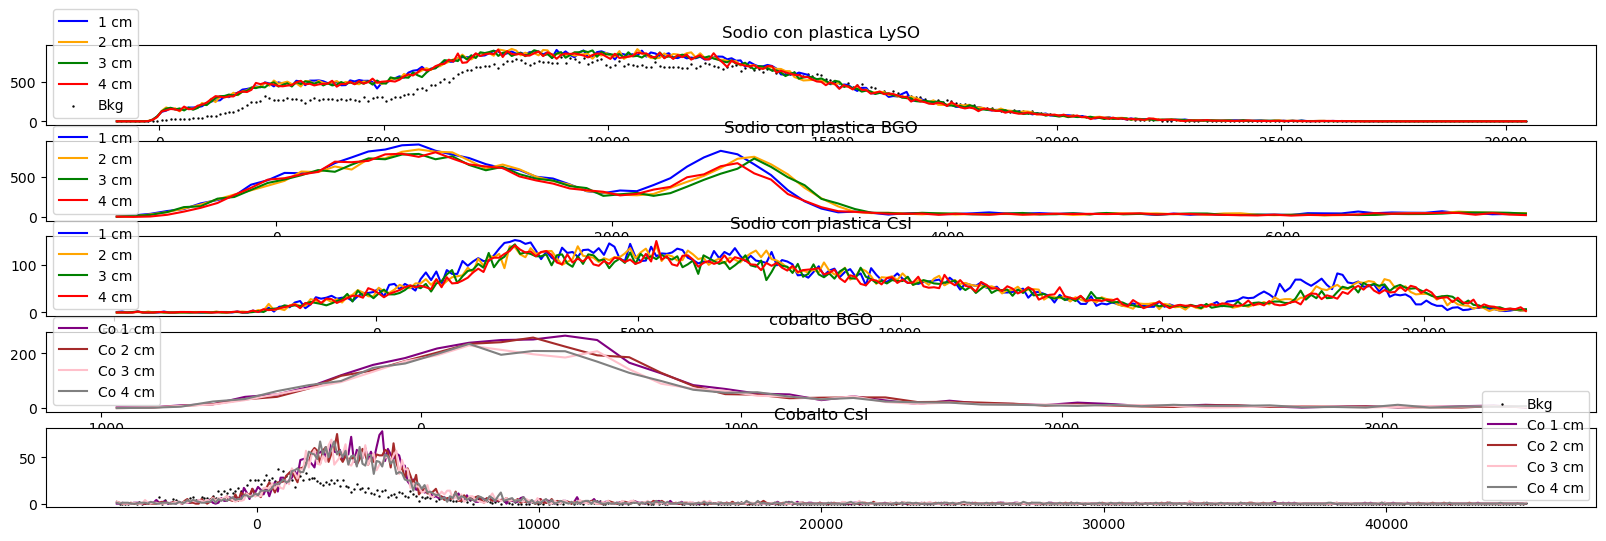

In [5]:
#spiego nome: sodio_lyso_1cm_plastica
# #prendo dati di LySO e fondo lyso
Na_L_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
bkg_L  = read_corretto(path = 'Dati/Parte 2/LySO/Bkg_55.5V.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO
Na_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
#prendo dati con CsI
Na_C_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_1.txt', titles = ['ADC', 'Counts'])
Na_C_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_2.txt', titles = ['ADC', 'Counts'])
Na_C_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_3.txt', titles = ['ADC', 'Counts'])
Na_C_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_4.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO con cobalto
#BGO
Co_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_1.txt', titles = ['ADC', 'Counts'])
Co_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_2.txt', titles = ['ADC', 'Counts'])
Co_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_3.txt', titles = ['ADC', 'Counts'])
Co_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_4.txt', titles = ['ADC', 'Counts'])
#CsI
Co_C_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_1.txt', titles = ['ADC', 'Counts'])
Co_C_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_2.txt', titles = ['ADC', 'Counts'])
Co_C_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_3.txt', titles = ['ADC', 'Counts'])
Co_C_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_4.txt', titles = ['ADC', 'Counts'])
#fondo CsI
bkg_C  = read_corretto(path = 'Dati/Parte 2/CsI/Bkg_54.5V.txt', titles = ['ADC', 'Counts'])
#farò dei plot, non plotto tutti gli zeri finali però
Fig, axes = plt.subplots(5, 1, figsize = (20, 6))
start_index = 0
end_index_L = 380 - 65
end_index_B = 150 - 65
end_index_C = 335 - 65
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_p['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_p['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_p['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_p['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], bkg_L['Counts'][start_index:end_index_L], label = 'Bkg', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')
axes[2].set_title('Sodio con plastica CsI')
axes[2].plot(Na_C_1_p['ADC'][start_index:end_index_C], Na_C_1_p['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[2].plot(Na_C_2_p['ADC'][start_index:end_index_C], Na_C_2_p['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[2].plot(Na_C_3_p['ADC'][start_index:end_index_C], Na_C_3_p['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[2].plot(Na_C_4_p['ADC'][start_index:end_index_C], Na_C_4_p['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[2].legend()
#Cobalto 
end_index_B = 110 - 65
axes[3].plot(Co_B_1_p['ADC'][start_index:end_index_B], Co_B_1_p['Counts'][start_index:end_index_B], label = 'Co 1 cm', color = 'purple')
axes[3].plot(Co_B_2_p['ADC'][start_index:end_index_B], Co_B_2_p['Counts'][start_index:end_index_B], label = 'Co 2 cm', color = 'brown')
axes[3].plot(Co_B_3_p['ADC'][start_index:end_index_B], Co_B_3_p['Counts'][start_index:end_index_B], label = 'Co 3 cm', color = 'pink')
axes[3].plot(Co_B_4_p['ADC'][start_index:end_index_B], Co_B_4_p['Counts'][start_index:end_index_B], label = 'Co 4 cm', color = 'gray')
axes[3].set_title('cobalto BGO')
axes[3].legend()
axes[4].set_title('Cobalto CsI')
start_index_C = 0
end_index_C = 600 - 65
axes[4].scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
axes[4].plot(Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'purple')
axes[4].plot(Co_C_2_p['ADC'][start_index_C:end_index_C], Co_C_2_p['Counts'][start_index_C:end_index_C], label = 'Co 2 cm', color = 'brown')
axes[4].plot(Co_C_3_p['ADC'][start_index_C:end_index_C], Co_C_3_p['Counts'][start_index_C:end_index_C], label = 'Co 3 cm', color = 'pink')
axes[4].plot(Co_C_4_p['ADC'][start_index_C:end_index_C], Co_C_4_p['Counts'][start_index_C:end_index_C], label = 'Co 4 cm', color = 'gray')
axes[4].legend()

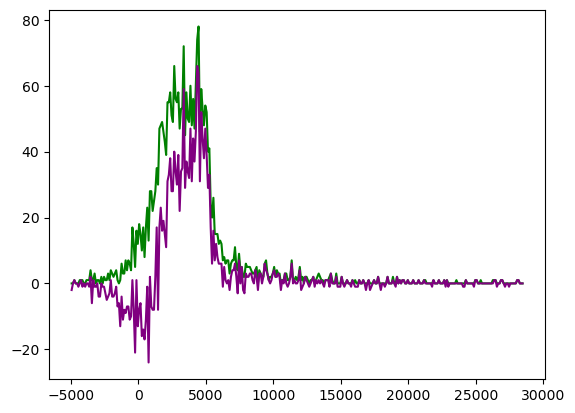

In [6]:
start_index_C = 0
end_index_C = 400 - 65
plt.plot(Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'green')
plt.plot (Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C]-bkg_C['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'purple')

## LySO

Text(0.5, 1.0, 'Sodio con plastica BGO')

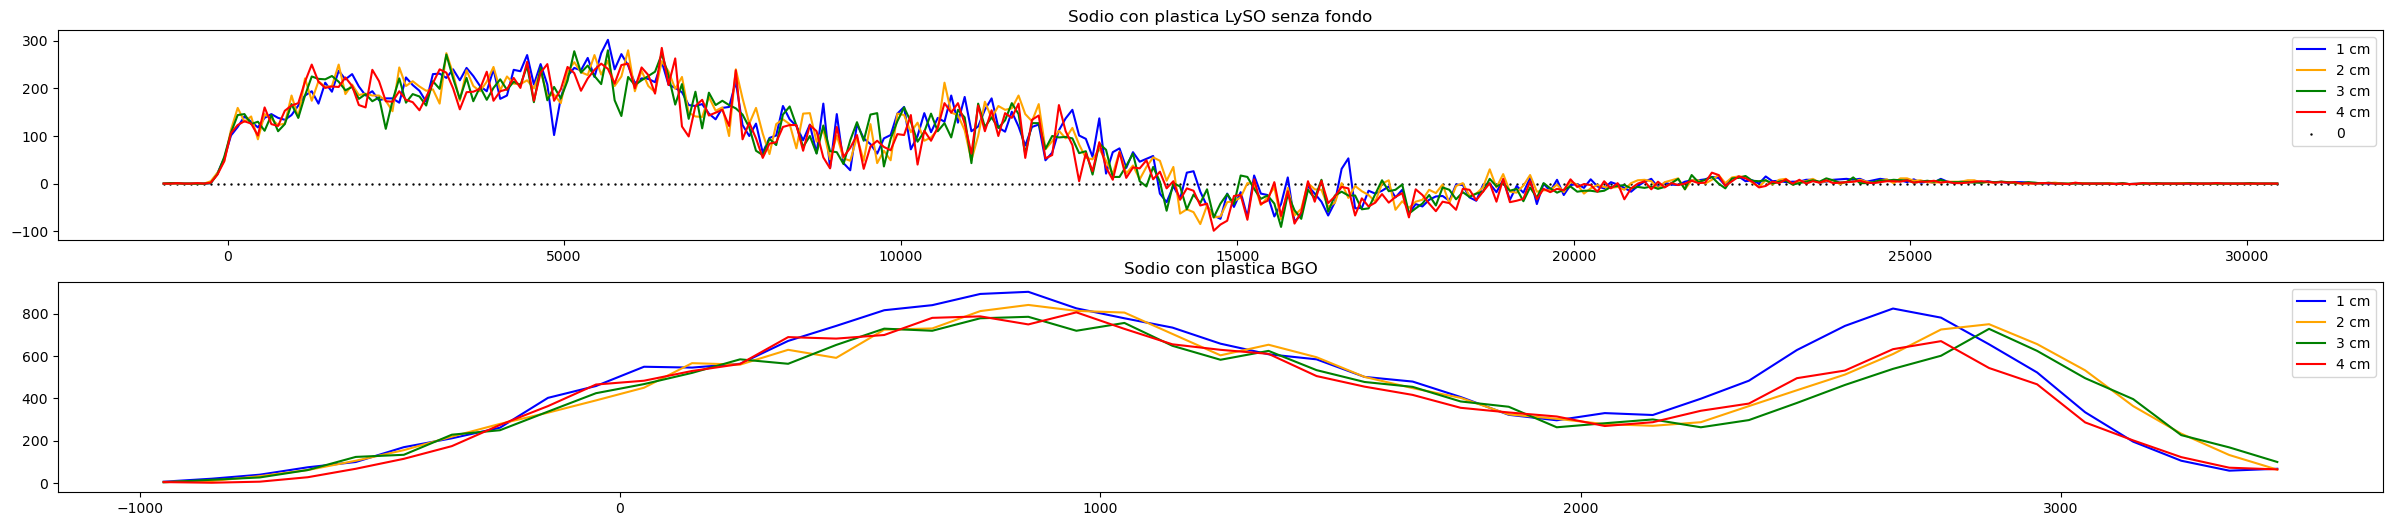

In [7]:
#non si vede una mazza con LySO, probabilmente è colpa del fondo, ora provo a toglierlo. e riplotto.
Na_L_1_nobkg_p = Na_L_1_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_p = Na_L_2_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_p = Na_L_3_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_p = Na_L_4_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
a = np.zeros(len(Na_L_1_nobkg_p))
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_nobkg_p, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_nobkg_p, label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_nobkg_p, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_nobkg_p, label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], a, label = '0', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO senza fondo')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

#non si capisce comunque una mazza col LySO

## BGO

### Na

In [8]:
#1cm
start_index = 92 - 65
end_index_B = 115 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_1_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 400, S = 400, a = 0, b = 0, c = 0)

s1 = vals[1]
mu1 = vals[0]
sig1 = vals[2]
err_S1 = errs[1]
err_sig1 = errs[2]
#2cm
start_index = 95 - 65
end_index_B = 115 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_2_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 700, a = 0, b = 0, c = 0 )
s2 = vals[1]
mu2 = vals[0]
sig2 = vals[2]
err_S2 = errs[1]
err_sig2 = errs[2]
#3cm
start_index = 97 - 65
end_index_B = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B],
                                   np.array(np.sqrt(Na_B_3_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)
s3 = vals[1]
mu3 = vals[0]
sig3 = vals[2]
err_S3 = errs[1]
err_sig3 = errs[2]
#4 cm
start_index = 90 - 65
end_index_B = 127 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_4_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_S4 = errs[1]
err_sig4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.15 (χ²/ndof = 1.6)      │              Nfcn = 414              │
│ EDM = 1.9e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.687e3  │  0.006e3  │            │            │         │         │       │
│ 1 │ sigma │    253    │     6     │            │            │         │         │       │
│ 2 │ S     │    693    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.24e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.65   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   87e-6   │   9e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         33.3           -7            4          123      -0.0764  11.49760e-6 │
│ sigma │           -7         38.1          -20          130      -0.1264  24.53924e-6 │
│     S │            4          -20          249       0.22e3      -0.1994  37.54702e-6 │
│     a │          123          130       0.22e3     4.78e+03      -3.4769 587.43847e-6 │
│     b │      -0.0764      -0.1264      -0.1994      -3.4769      0.00262   -450.65e-9 │
│     c │  11.49760e-6  24.53924e-6  37.54702e-6 587.43847e-6   -450.65e-9     7.85e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.36 (χ²/ndof = 1.3)      │              Nfcn = 405              │
│ EDM = 5.2e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.823e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    269    │     8     │            │            │         │         │       │
│ 2 │ S     │    644    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.34e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -0.72   │   0.09    │            │            │         │         │       │
│ 5 │ c     │ 0.100e-3  │ 0.015e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          45.8           -20             0           300        -0.175   25.00621e-6 │
│ sigma │           -20          68.9            20           390        -0.356   66.32647e-6 │
│     S │             0            20           270        0.79e3        -0.649  115.94643e-6 │
│     a │           300           390        0.79e3       1.5e+04       -10.701 1.77264709e-3 │
│     b │        -0.175        -0.356        -0.649       -10.701        0.0078   -1.30978e-6 │
│     c │   25.00621e-6   66.32647e-6  115.94643e-6 1.77264709e-3   -1.30978e-6      2.22e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.77 (χ²/ndof = 1.7)      │              Nfcn = 379              │
│ EDM = 2.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.853e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    259    │     9     │            │            │         │         │       │
│ 2 │ S     │    549    │    15     │            │            │         │         │       │
│ 3 │ a     │  1.02e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -0.48   │   0.06    │            │            │         │         │       │
│ 5 │ c     │   59e-6   │   9e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         79.7          -40          -30          700       -0.359  45.66954e-6 │
│ sigma │          -40         83.6           10         -490        0.200 -19.39373e-6 │
│     S │          -30           10          232      -0.46e3        0.185 -17.35181e-6 │
│     a │          700         -490      -0.46e3     1.32e+04       -7.105 950.90110e-6 │
│     b │       -0.359        0.200        0.185       -7.105      0.00395   -542.80e-9 │
│     c │  45.66954e-6 -19.39373e-6 -17.35181e-6 950.90110e-6   -542.80e-9     7.62e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 53.03 (χ²/ndof = 1.7)      │              Nfcn = 573              │
│ EDM = 3.51e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.718e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    237    │     6     │            │            │         │         │       │
│ 2 │ S     │    496    │    14     │            │            │         │         │       │
│ 3 │ a     │    961    │    24     │            │            │         │         │       │
│ 4 │ b     │  -0.429   │   0.013   │            │            │         │         │       │
│ 5 │ c     │  49.2e-6  │  1.7e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          47.9           -10             0            40     -21.01e-3  2.5321366e-6 │
│ sigma │           -10          38.8           -40           -30      11.36e-3  -808.5584e-9 │
│     S │             0           -40           195       -0.03e3       9.57e-3  -727.3085e-9 │
│     a │            40           -30       -0.03e3           586    -301.78e-3 37.7752985e-6 │
│     b │     -21.01e-3      11.36e-3       9.57e-3    -301.78e-3      0.000164   -21.2832e-9 │
│     c │  2.5321366e-6  -808.5584e-9  -727.3085e-9 37.7752985e-6   -21.2832e-9      2.85e-12 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

### Co

In [9]:
# 1cm
start_index_B = 0
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_1_p['ADC'][start_index_B:end_index_B], Co_B_1_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_1_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol2, mu = 100, sigma = 300, S = 400, a = 0, b = 0, c = 0)

s1 = vals[2]
sig1 = vals[1]
err_s1 = errs[2]
err_sig1 = errs[1]

#2 cm
start_index_B = 4
end_index_B = 90 - 65
pars, vals, errs, *others = LS_fit(Co_B_2_p['ADC'][start_index_B:end_index_B], Co_B_2_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_2_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol2, mu = 280, sigma = 250, S = 250, a = 10, b = 0, c = 0)

s2 = vals[2]
sig2 = vals[1]
err_s2 = errs[2]
err_sig2 = errs[1]

#3 cm
start_index_B = 0
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_3_p['ADC'][start_index_B:end_index_B], Co_B_3_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_3_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol2, mu = 280, sigma = 250, S = 200, a = 10, b = 0, c = 0)
s3 = vals[2]
sig3 = vals[1]
err_s3 = errs[2]
err_sig3 = errs[1]

# 4cm
start_index_B = 4
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_4_p['ADC'][start_index_B:end_index_B], Co_B_4_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_4_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol2, mu = 280, sigma = 250, S = 200, a = 10, b = 0, c = 0)
s4 = vals[2]
sig4 = vals[1]
err_s4 = errs[2]
err_sig4 = errs[1]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 48.75 (χ²/ndof = 1.7)      │              Nfcn = 245              │
│ EDM = 0.000106 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    271    │    10     │            │            │         │         │       │
│ 1 │ sigma │    383    │    10     │            │            │         │         │       │
│ 2 │ S     │    245    │     7     │            │            │         │         │       │
│ 3 │ a     │   16.0    │    2.6    │            │            │         │         │       │
│ 4 │ b     │  0.0124   │  0.0015   │            │            │         │         │       │
│ 5 │ c     │  -6.5e-6  │  1.2e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          95.7            10             0            -4    -4.9304e-3  2.9209659e-6 │
│ sigma │            10           102           -20           -17    -5.2144e-3  6.0700373e-6 │
│     S │             0           -20          48.1            -3    -3.0532e-3  2.2326085e-6 │
│     a │            -4           -17            -3          6.75     3.1064e-3 -2.9347187e-6 │
│     b │    -4.9304e-3    -5.2144e-3    -3.0532e-3     3.1064e-3      2.39e-06    -1.7645e-9 │
│     c │  2.9209659e-6  6.0700373e-6  2.2326085e-6 -2.9347187e-6    -1.7645e-9      1.52e-12 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.89 (χ²/ndof = 0.9)      │              Nfcn = 302              │
│ EDM = 2.3e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    272    │    14     │            │            │         │         │       │
│ 1 │ sigma │    401    │    31     │            │            │         │         │       │
│ 2 │ S     │    279    │    30     │            │            │         │         │       │
│ 3 │ a     │    -26    │    30     │            │            │         │         │       │
│ 4 │ b     │  -0.018   │   0.017   │            │            │         │         │       │
│ 5 │ c     │ 0.043e-3  │ 0.025e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │          193      -0.01e3       0.07e3      -0.04e3   -119.27e-3   99.3050e-6 │
│ sigma │      -0.01e3          974        0.8e3       -0.9e3   -355.22e-3  660.2643e-6 │
│     S │       0.07e3        0.8e3          904       -0.9e3   -430.14e-3  722.1622e-6 │
│     a │      -0.04e3       -0.9e3       -0.9e3          895    408.11e-3 -713.9574e-6 │
│     b │   -119.27e-3   -355.22e-3   -430.14e-3    408.11e-3     0.000274    -391.7e-9 │
│     c │   99.3050e-6  660.2643e-6  722.1622e-6 -713.9574e-6    -391.7e-9     6.24e-10 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 39.6 (χ²/ndof = 1.4)       │              Nfcn = 268              │
│ EDM = 7.49e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    248    │    11     │            │            │         │         │       │
│ 1 │ sigma │    374    │    11     │            │            │         │         │       │
│ 2 │ S     │    201    │     6     │            │            │         │         │       │
│ 3 │ a     │   18.2    │    2.1    │            │            │         │         │       │
│ 4 │ b     │  0.0133   │  0.0013   │            │            │         │         │       │
│ 5 │ c     │  -8.0e-6  │  0.9e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │           121        0.02e3            -0            -4    -4.3775e-3  2.6005766e-6 │
│ sigma │        0.02e3           118           -30           -14    -3.9721e-3  4.4007803e-6 │
│     S │            -0           -30          40.9            -2    -1.9490e-3  1.2734777e-6 │
│     a │            -4           -14            -2          4.27     1.9831e-3 -1.7229778e-6 │
│     b │    -4.3775e-3    -3.9721e-3    -1.9490e-3     1.9831e-3       1.6e-06    -1.0834e-9 │
│     c │  2.6005766e-6  4.4007803e-6  1.2734777e-6 -1.7229778e-6    -1.0834e-9      8.44e-13 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 32.54 (χ²/ndof = 1.3)      │              Nfcn = 304              │
│ EDM = 5.97e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    228    │    19     │            │            │         │         │       │
│ 1 │ sigma │    402    │    24     │            │            │         │         │       │
│ 2 │ S     │    197    │     8     │            │            │         │         │       │
│ 3 │ a     │    16     │     9     │            │            │         │         │       │
│ 4 │ b     │   0.012   │   0.008   │            │            │         │         │       │
│ 5 │ c     │  -6.8e-6  │  2.0e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │           369        -0.3e3           -60           120    -118.16e-3  28.504606e-6 │
│ sigma │        -0.3e3           586            50          -190     140.17e-3 -24.044412e-6 │
│     S │           -60            50          59.4           -40      29.00e-3  -4.983478e-6 │
│     a │           120          -190           -40          76.1     -58.18e-3  10.460455e-6 │
│     b │    -118.16e-3     140.17e-3      29.00e-3     -58.18e-3      5.62e-05    -13.466e-9 │
│     c │  28.504606e-6 -24.044412e-6  -4.983478e-6  10.460455e-6    -13.466e-9      4.04e-12 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

### Confronto

In [10]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_p = vals[1]
err_att_B_p = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.803 (χ²/ndof = 2.9)      │              Nfcn = 388              │
│ EDM = 4.66e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   102e3   │    6e3    │            │            │         │         │       │
│ 1 │ b    │   0.085   │   0.023   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  3.4e+07 121.2835 │
│ b │ 121.2835 0.000548 │
└───┴───────────────────┘

## CsI

### Na

In [11]:
# 1 cm
start_index = 250 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_1_p['ADC'][start_index:end_index_C], Na_C_1_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_1_p['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0, c = 0)
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_2_p['ADC'][start_index:end_index_C], Na_C_2_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_p['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0, c = 0)
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]

# 3 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_3_p['ADC'][start_index:end_index_C], Na_C_3_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_3_p['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0, c = 0)
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_4_p['ADC'][start_index:end_index_C], Na_C_4_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_4_p['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0, c = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 97.33 (χ²/ndof = 1.0)      │              Nfcn = 347              │
│ EDM = 0.000114 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 18.242e3  │  0.034e3  │            │            │         │         │       │
│ 1 │ sigma │  1.05e3   │  0.04e3   │            │            │         │         │       │
│ 2 │ S     │   61.4    │    2.3    │            │            │         │         │       │
│ 3 │ a     │    130    │    28     │            │            │         │         │       │
│ 4 │ b     │  -0.0121  │  0.0032   │            │            │         │         │       │
│ 5 │ c     │  0.29e-6  │  0.09e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       1.18e+03         -0.1e3              5          0.1e3     -12.520e-3  303.676350e-9 │
│ sigma │         -0.1e3       1.69e+03             -6          0.7e3     -81.206e-3 2.223936213e-6 │
│     S │              5             -6           5.14             25      -2.819e-3   76.785463e-9 │
│     a │          0.1e3          0.7e3             25            782     -88.082e-3 2.372749501e-6 │
│     b │     -12.520e-3     -81.206e-3      -2.819e-3     -88.082e-3       9.95e-06   -268.728e-12 │
│     c │  303.676350e-9 2.223936213e-6   76.785463e-9 2.372749501e-6   -268.728e-12       7.27e-15 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 66.26 (χ²/ndof = 0.9)      │              Nfcn = 359              │
│ EDM = 3.39e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.92e3  │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │  1.00e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   57.7    │    2.4    │            │            │         │         │       │
│ 3 │ a     │    150    │    50     │            │            │         │         │       │
│ 4 │ b     │  -0.014   │   0.005   │            │            │         │         │       │
│ 5 │ c     │  0.33e-6  │  0.14e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       1.38e+03         -0.2e3             10          0.4e3     -42.119e-3 1.011786896e-6 │
│ sigma │         -0.2e3       2.14e+03              9          1.4e3    -154.240e-3 4.083309751e-6 │
│     S │             10              9           5.69             59      -6.446e-3  168.607416e-9 │
│     a │          0.4e3          1.4e3             59       2.59e+03    -276.110e-3 7.140411436e-6 │
│     b │     -42.119e-3    -154.240e-3      -6.446e-3    -276.110e-3       2.95e-05   -764.605e-12 │
│     c │ 1.011786896e-6 4.083309751e-6  168.607416e-9 7.140411436e-6   -764.605e-12       1.98e-14 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 63 (χ²/ndof = 0.9)         │              Nfcn = 383              │
│ EDM = 1.41e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  19.16e3  │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │  1.16e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   51.4    │    1.8    │            │            │         │         │       │
│ 3 │ a     │   176.4   │    3.1    │            │            │         │         │       │
│ 4 │ b     │ -16.58e-3 │  0.23e-3  │            │            │         │         │       │
│ 5 │ c     │  394e-9   │   7e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │              mu           sigma               S               a               b               c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │        1.75e+03          -0.6e3            -0.3              45      -129.45e-6 -84.08751015e-9 │
│ sigma │          -0.6e3        2.08e+03           -25.3             -51      -481.99e-6  93.30720686e-9 │
│     S │            -0.3           -25.3            3.34            -0.7       -13.71e-6   1.80024675e-9 │
│     a │              45             -51            -0.7            9.79      -493.95e-6   2.85183640e-9 │
│     b │      -129.45e-6      -481.99e-6       -13.71e-6      -493.95e-6        5.23e-08    -1.33182e-12 │
│     c │ -84.08751015e-9  93.30720686e-9   1.80024675e-9   2.85183640e-9    -1.33182e-12        5.36e-17 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 76.08 (χ²/ndof = 1.0)      │              Nfcn = 391              │
│ EDM = 6.47e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  19.27e3  │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │  1.11e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   45.4    │    1.8    │            │            │         │         │       │
│ 3 │ a     │   199.4   │    3.2    │            │            │         │         │       │
│ 4 │ b     │ -18.56e-3 │  0.24e-3  │            │            │         │         │       │
│ 5 │ c     │  438e-9   │   8e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │              mu           sigma               S               a               b               c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │        1.98e+03          -0.6e3            -0.8              42      -118.95e-6 -83.13270587e-9 │
│ sigma │          -0.6e3        2.15e+03           -24.3             -43      -563.14e-6  79.74961480e-9 │
│     S │            -0.8           -24.3            3.21            -0.7       -15.58e-6   1.83350718e-9 │
│     a │              42             -43            -0.7              10      -549.47e-6   4.62410526e-9 │
│     b │      -118.95e-6      -563.14e-6       -15.58e-6      -549.47e-6        5.81e-08    -1.47625e-12 │
│     c │ -83.13270587e-9  79.74961480e-9   1.83350718e-9   4.62410526e-9    -1.47625e-12        5.71e-17 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

### Co

In [12]:
# 1 cm
start_index_C = 100 - 65
end_index_C = 200 - 65
y = (Co_C_1_p['Counts'][start_index_C:end_index_C] - bkg_C['Counts'][start_index_C:end_index_C])
pars, vals, errs, *others = LS_fit(Co_C_1_p['ADC'][start_index_C:end_index_C], y,
                                   np.array(np.sqrt(Na_C_1_p['Counts'][start_index_C:end_index_C])), gauss_pol2, 
                                   mu = 4000, sigma = 200, S = 50, a = 0, b = 0, c = 0)
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_2_p['ADC'][start_index_C:end_index_C], Co_C_2_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_2_p['Counts'][start_index_C:end_index_C])), gauss_pol2, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0, c = 0)
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]

# 3 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_3_p['ADC'][start_index_C:end_index_C], Co_C_3_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_3_p['Counts'][start_index_C:end_index_C])), gauss_pol2, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0, c = 0)
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_4_p['ADC'][start_index_C:end_index_C], Co_C_4_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_4_p['Counts'][start_index_C:end_index_C])), gauss_pol2, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0, c = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 76.54 (χ²/ndof = 0.8)      │              Nfcn = 340              │
│ EDM = 1.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.73e3   │  0.08e3   │            │            │         │         │       │
│ 1 │ sigma │  1.55e3   │  0.16e3   │            │            │         │         │       │
│ 2 │ S     │    63     │     8     │            │            │         │         │       │
│ 3 │ a     │    -13    │     4     │            │            │         │         │       │
│ 4 │ b     │  -0.0031  │  0.0026   │            │            │         │         │       │
│ 5 │ c     │  0.6e-6   │  0.4e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       7.18e+03           -2e3           -150             93      50.514e-3 -9.11213988e-6 │
│ sigma │           -2e3        2.5e+04            960           -514    -353.728e-3 48.45290666e-6 │
│     S │           -150            960           63.9            -26     -19.909e-3  2.76256283e-6 │
│     a │             93           -514            -26           13.3       8.803e-3 -1.24833069e-6 │
│     b │      50.514e-3    -353.728e-3     -19.909e-3       8.803e-3          7e-06    -971.45e-12 │
│     c │ -9.11213988e-6 48.45290666e-6  2.76256283e-6 -1.24833069e-6    -971.45e-12       1.37e-13 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 146.8 (χ²/ndof = 1.6)      │              Nfcn = 390              │
│ EDM = 1.24e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.23e3   │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │  1.90e3   │  0.14e3   │            │            │         │         │       │
│ 2 │ S     │    68     │     8     │            │            │         │         │       │
│ 3 │ a     │    -6     │     5     │            │            │         │         │       │
│ 4 │ b     │  -0.0038  │  0.0020   │            │            │         │         │       │
│ 5 │ c     │  0.56e-6  │  0.30e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       1.92e+03          0.7e3             70            -23     -22.811e-3  2.84857942e-6 │
│ sigma │          0.7e3       1.99e+04         1.01e3           -696    -258.763e-3 39.43828420e-6 │
│     S │             70         1.01e3             61            -38     -15.166e-3  2.29778924e-6 │
│     a │            -23           -696            -38           25.6       9.635e-3 -1.47250186e-6 │
│     b │     -22.811e-3    -258.763e-3     -15.166e-3       9.635e-3       3.93e-06    -592.19e-12 │
│     c │  2.84857942e-6 39.43828420e-6  2.29778924e-6 -1.47250186e-6    -592.19e-12       8.95e-14 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 151.4 (χ²/ndof = 1.6)      │              Nfcn = 443              │
│ EDM = 6.1e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.28e3   │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │  1.96e3   │  0.17e3   │            │            │         │         │       │
│ 2 │ S     │    70     │    10     │            │            │         │         │       │
│ 3 │ a     │    -8     │     6     │            │            │         │         │       │
│ 4 │ b     │  -0.0046  │  0.0026   │            │            │         │         │       │
│ 5 │ c     │  0.7e-6   │  0.4e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       1.89e+03          1.4e3         0.10e3            -50     -32.248e-3  4.20126326e-6 │
│ sigma │          1.4e3       2.92e+04         1.63e3        -1.09e3    -411.772e-3 61.71089146e-6 │
│     S │         0.10e3         1.63e3            102            -60     -25.435e-3  3.79826594e-6 │
│     a │            -50        -1.09e3            -60           41.9      16.038e-3 -2.40749878e-6 │
│     b │     -32.248e-3    -411.772e-3     -25.435e-3      16.038e-3       6.48e-06    -963.52e-12 │
│     c │  4.20126326e-6 61.71089146e-6  3.79826594e-6 -2.40749878e-6    -963.52e-12       1.44e-13 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 98.91 (χ²/ndof = 1.1)      │              Nfcn = 371              │
│ EDM = 4.09e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.08e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.81e3   │  0.12e3   │            │            │         │         │       │
│ 2 │ S     │    63     │     6     │            │            │         │         │       │
│ 3 │ a     │    -4     │     4     │            │            │         │         │       │
│ 4 │ b     │  -0.0020  │  0.0015   │            │            │         │         │       │
│ 5 │ c     │  0.36e-6  │  0.23e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       2.05e+03          1.2e3             70            -33    -22.5808e-3  3.01638320e-6 │
│ sigma │          1.2e3       1.51e+04            623           -461   -166.6418e-3 26.24196464e-6 │
│     S │             70            623           33.6            -21     -8.3494e-3  1.30639300e-6 │
│     a │            -33           -461            -21             15      5.5331e-3  -874.68862e-9 │
│     b │    -22.5808e-3   -166.6418e-3     -8.3494e-3      5.5331e-3       2.22e-06    -345.62e-12 │
│     c │  3.01638320e-6 26.24196464e-6  1.30639300e-6  -874.68862e-9    -345.62e-12        5.4e-14 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

### Confronto

In [13]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_C_p = vals[1]
err_att_C_p = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.613 (χ²/ndof = 1.3)      │              Nfcn = 431              │
│ EDM = 1.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.106e6  │  0.018e6  │            │            │         │         │       │
│ 1 │ b    │   -0.03   │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 3.16e+08 892.5739 │
│ b │ 892.5739  0.00307 │
└───┴───────────────────┘

# Alluminio

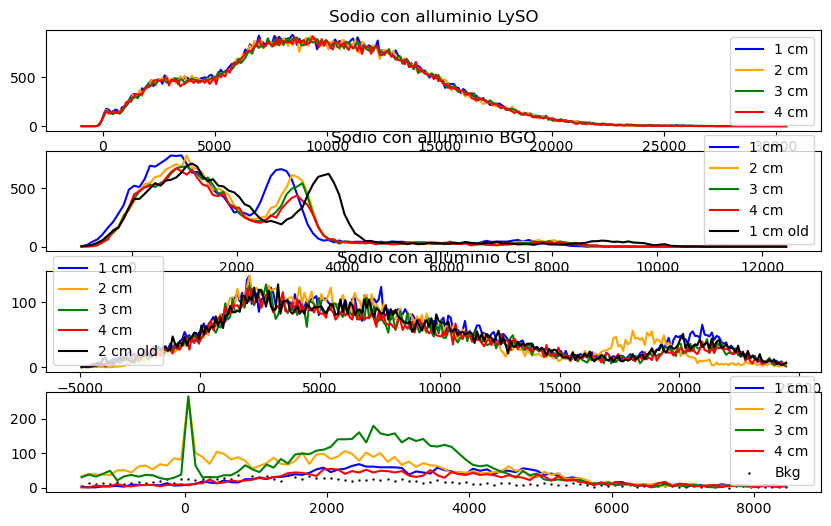

In [38]:
start_index = 0
#spiego nome: sodio_lyso_1cm_alluminio
#LySO

Na_L_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
#BGO
Na_B_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
Na_B_1_al_old = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1(old).txt', titles = ['ADC', 'Counts'])
#CsI
Na_C_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_1.txt', titles = ['ADC', 'Counts'])
Na_C_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_2.txt', titles = ['ADC', 'Counts'])
Na_C_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_3.txt', titles = ['ADC', 'Counts'])
Na_C_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_4.txt', titles = ['ADC', 'Counts'])
Na_C_2_al_old = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_2(old).txt', titles = ['ADC', 'Counts'])
#Cobalto CsI
Co_C_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_1.txt', titles = ['ADC', 'Counts'])
Co_C_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_2.txt', titles = ['ADC', 'Counts'])
Co_C_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_3.txt', titles = ['ADC', 'Counts'])
Co_C_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_4.txt', titles = ['ADC', 'Counts'])
Fig, axes = plt.subplots(4, 1, figsize = (10, 6))
end_index_L = 380-65
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_al['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_al['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_al['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_al['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO')
end_index_B = 200 - 65
axes[1].plot(Na_B_1_al['ADC'][start_index:end_index_B], Na_B_1_al['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_al['ADC'][start_index:end_index_B], Na_B_2_al['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_al['ADC'][start_index:end_index_B], Na_B_3_al['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_al['ADC'][start_index:end_index_B], Na_B_4_al['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].plot(Na_B_1_al_old['ADC'][start_index:end_index_B], Na_B_1_al_old['Counts'][start_index:end_index_B], label = '1 cm old', color = 'black')
axes[1].legend()
axes[1].set_title('Sodio con alluminio BGO')
axes[2].set_title('Sodio con alluminio CsI')
end_index_C = 360 - 65
axes[2].plot(Na_C_1_al['ADC'][start_index:end_index_C], Na_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[2].plot(Na_C_2_al['ADC'][start_index:end_index_C], Na_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[2].plot(Na_C_3_al['ADC'][start_index:end_index_C], Na_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[2].plot(Na_C_4_al['ADC'][start_index:end_index_C], Na_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[2].plot(Na_C_2_al_old['ADC'][start_index:end_index_C], Na_C_2_al_old['Counts'][start_index:end_index_C], label = '2 cm old', color = 'black')
axes[2].legend()
start_index = 35
end_index_C = 200 - 65
axes[3].plot(Co_C_1_al['ADC'][start_index:end_index_C], Co_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[3].plot(Co_C_2_al['ADC'][start_index:end_index_C], Co_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[3].plot(Co_C_3_al['ADC'][start_index:end_index_C], Co_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[3].plot(Co_C_4_al['ADC'][start_index:end_index_C], Co_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[3].scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
axes[3].legend()

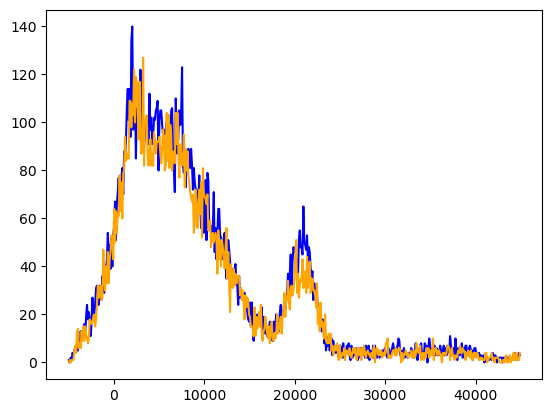

In [15]:
plt.plot(Na_C_2_al['ADC'][start_index:len(Na_C_1_al)-1], Na_C_1_al['Counts'][start_index:len(Na_C_1_al)-1], label = '1 cm', color = 'blue')
plt.plot(Na_C_2_al['ADC'][start_index:len(Na_C_1_al)-1], Na_C_2_al_old['Counts'][start_index:len(Na_C_1_al)-1], label = '2 cm', color = 'orange')

## LySO

Text(0.5, 1.0, 'Sodio con alluminio LySO senza fondo')

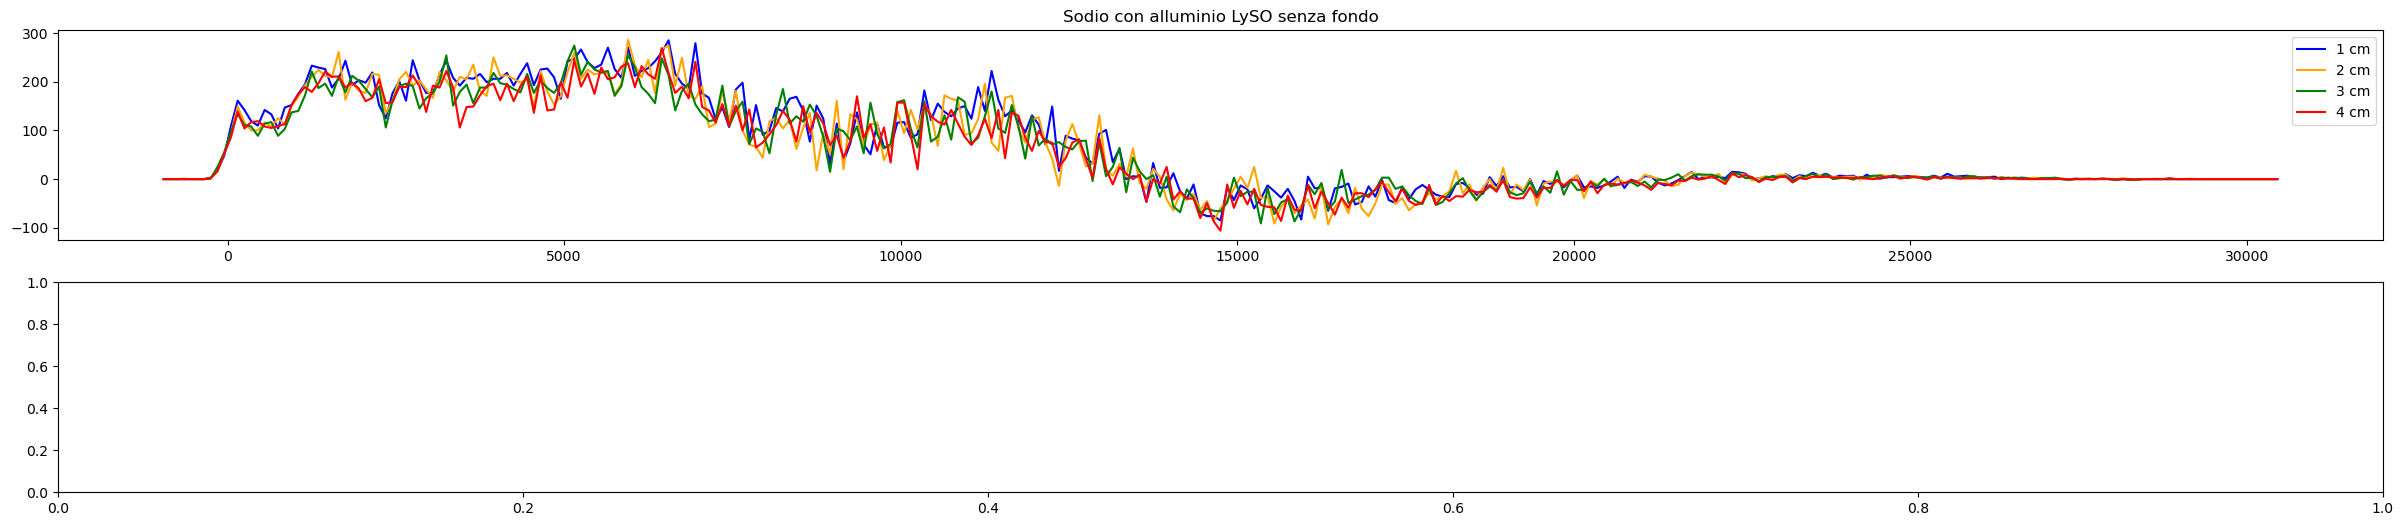

In [16]:
#tolgo sempre il fondo a lyso
Na_L_1_nobkg_al = Na_L_1_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_al = Na_L_2_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_al = Na_L_3_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_al = Na_L_4_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_nobkg_al, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_nobkg_al, label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_nobkg_al, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_nobkg_al, label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO senza fondo')
#pure questo fa schifo!

## BGO

In [17]:
si1 = 99 - 65
ei1 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_al['ADC'][si1 : ei1], Na_B_1_al['Counts'][si1 : ei1], np.array(np.sqrt(Na_B_1_al['Counts'][si1 : ei1])),
                                   gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu1 = vals[0]
sig1 = vals[1]
a1 = vals[2]
er_sig1 = errs[1]
er_a1 = errs[2]

si2 = 94 - 65
ei2 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_al['ADC'][si2 : ei2], Na_B_2_al['Counts'][si2 : ei2], np.array(np.sqrt(Na_B_2_al['Counts'][si2 : ei2])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu2 = vals[0]
sig2 = vals[1]
a2 = vals[2]
er_sig2 = errs[1]
er_a2 = errs[2]

si3 = 97 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_al['ADC'][si3 : ei], Na_B_3_al['Counts'][si3 : ei], np.array(np.sqrt(Na_B_3_al['Counts'][si3 : ei])),
                                      gauss_pol3, mu = 4000, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu3 = vals[0]  
sig3 = vals[1]
a3 = vals[2]
er_sig3 = errs[1]
er_a3 = errs[2]

si4 = 96 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_al['ADC'][si4 : ei], Na_B_4_al['Counts'][si4 : ei], np.array(np.sqrt(Na_B_4_al['Counts'][si4 : ei])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu4 = vals[0]
sig4 = vals[1]
a4 = vals[2]
er_sig4 = errs[1]
er_a4 = errs[2]

print(mu1, mu2, mu3, mu4)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.09 (χ²/ndof = 1.0)      │              Nfcn = 544              │
│ EDM = 2.31e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.864e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    285    │     7     │            │            │         │         │       │
│ 2 │ S     │    593    │    14     │            │            │         │         │       │
│ 3 │ a     │  1.879e3  │  0.015e3  │            │            │         │         │       │
│ 4 │ b     │  -1.293   │   0.005   │            │            │         │         │       │
│ 5 │ c     │ 302.1e-6  │  1.1e-6   │            │            │         │         │       │
│ 6 │ d     │ -23.43e-9 │  0.18e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                 mu              sigma                  S                  a                  b                  c                  d │
├───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │               46.5                -20                 10                 10          -2.807e-3       -469.0737e-9   95.273420594e-12 │
│ sigma │                -20               44.7                -30                -30           1.643e-3        871.3213e-9   62.276531128e-12 │
│     S │                 10                -30                183            -0.05e3           5.647e-3       1.5783970e-6 -101.907004728e-12 │
│     a │                 10                -30            -0.05e3                225         -56.210e-3      -3.8375849e-6  1.124360105742e-9 │
│     b │          -2.807e-3           1.643e-3           5.647e-3         -56.210e-3           2.43e-05         -1.6870e-9    -201.663578e-15 │
│     c │       -469.0737e-9        871.3213e-9       1.5783970e-6      -3.8375849e-6         -1.6870e-9           1.29e-12       -158.411e-18 │
│     d │   95.273420594e-12   62.276531128e-12 -101.907004728e-12  1.124360105742e-9    -201.663578e-15       -158.411e-18           3.29e-20 │
└───────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.92 (χ²/ndof = 1.5)      │              Nfcn = 585              │
│ EDM = 8.71e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.111e3  │  0.006e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │     6     │            │            │         │         │       │
│ 2 │ S     │    526    │    13     │            │            │         │         │       │
│ 3 │ a     │  1.573e3  │  0.012e3  │            │            │         │         │       │
│ 4 │ b     │  -0.967   │   0.005   │            │            │         │         │       │
│ 5 │ c     │ 200.4e-6  │  1.0e-6   │            │            │         │         │       │
│ 6 │ d     │ -13.68e-9 │  0.17e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              42.1               -20                10                20         -2.215e-3      -532.8606e-9  57.023183439e-12 │
│ sigma │               -20              40.8               -30               -20         -1.217e-3       412.0145e-9  155.55550894e-12 │
│     S │                10               -30               163           -0.01e3         -0.915e-3       269.5773e-9  82.744441478e-12 │
│     a │                20               -20           -0.01e3               132        -39.372e-3     -1.0700377e-6 725.427692726e-12 │
│     b │         -2.215e-3         -1.217e-3         -0.915e-3        -39.372e-3          2.06e-05        -1.8611e-9   -167.530262e-15 │
│     c │      -532.8606e-9       412.0145e-9       269.5773e-9     -1.0700377e-6        -1.8611e-9          1.07e-12      -132.756e-18 │
│     d │  57.023183439e-12  155.55550894e-12  82.744441478e-12 725.427692726e-12   -167.530262e-15      -132.756e-18          2.97e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 41.77 (χ²/ndof = 1.6)      │              Nfcn = 695              │
│ EDM = 2.76e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.139e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    254    │     7     │            │            │         │         │       │
│ 2 │ S     │    452    │    12     │            │            │         │         │       │
│ 3 │ a     │  1.410e3  │  0.011e3  │            │            │         │         │       │
│ 4 │ b     │  -0.843   │   0.004   │            │            │         │         │       │
│ 5 │ c     │ 170.7e-6  │  0.8e-6   │            │            │         │         │       │
│ 6 │ d     │ -11.43e-9 │  0.11e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              48.4               -20                10                10         -2.664e-3      -449.6903e-9  72.828341750e-12 │
│ sigma │               -20              44.4               -40               -20          1.569e-3       585.7797e-9   6.922150135e-12 │
│     S │                10               -40               150           -0.01e3          0.784e-3       329.0432e-9  -6.103268084e-12 │
│     a │                10               -20           -0.01e3               115        -30.564e-3     -1.2044109e-6 527.282166204e-12 │
│     b │         -2.664e-3          1.569e-3          0.784e-3        -30.564e-3          1.33e-05        -1.0330e-9    -79.543886e-15 │
│     c │      -449.6903e-9       585.7797e-9       329.0432e-9     -1.2044109e-6        -1.0330e-9          6.04e-13       -69.035e-18 │
│     d │  72.828341750e-12   6.922150135e-12  -6.103268084e-12 527.282166204e-12    -79.543886e-15       -69.035e-18          1.29e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.95 (χ²/ndof = 1.3)      │              Nfcn = 651              │
│ EDM = 6.39e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.141e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │     8     │            │            │         │         │       │
│ 2 │ S     │    346    │    11     │            │            │         │         │       │
│ 3 │ a     │  1.19e3   │  0.01e3   │            │            │         │         │       │
│ 4 │ b     │  -0.6762  │  0.0034   │            │            │         │         │       │
│ 5 │ c     │ 130.9e-6  │  0.7e-6   │            │            │         │         │       │
│ 6 │ d     │ -8.44e-9  │  0.10e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              74.9               -30                10                20         -3.078e-3      -505.8213e-9  82.282967170e-12 │
│ sigma │               -30              68.8               -40               -30          1.473e-3       637.7675e-9  22.108921507e-12 │
│     S │                10               -40               117               -10          0.637e-3       319.6665e-9   2.377457998e-12 │
│     a │                20               -30               -10                98        -26.027e-3      -933.2655e-9 430.876628046e-12 │
│     b │         -3.078e-3          1.473e-3          0.637e-3        -26.027e-3          1.15e-05        -910.3e-12    -67.939510e-15 │
│     c │      -505.8213e-9       637.7675e-9       319.6665e-9      -933.2655e-9        -910.3e-12          5.12e-13       -57.929e-18 │
│     d │  82.282967170e-12  22.108921507e-12   2.377457998e-12 430.876628046e-12    -67.939510e-15       -57.929e-18           1.1e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

2863.5717546046026 3111.113761275154 3139.3682779321007 3141.018772327328


### Confronto

In [18]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
                                            [prop_err_mol(a1, sig1, er_a1, er_sig1),
                                             prop_err_mol(a2, sig2, er_a2, er_sig2),
                                             prop_err_mol(a3, sig3, er_a3, er_sig3),
                                             prop_err_mol(a4, sig4, er_a4, er_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_al = vals[1]
err_att_B_al = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.231 (χ²/ndof = 0.1)      │              Nfcn = 359              │
│ EDM = 3.75e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   208e3   │    9e3    │            │            │         │         │       │
│ 1 │ b    │   0.199   │   0.017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  7.65e+07 132.03488 │
│ b │ 132.03488   0.00028 │
└───┴─────────────────────┘

## CsI

In [19]:
# 1 cm
start_index = 280 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_1_al['ADC'][start_index:end_index_C], Na_C_1_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_1_al['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 22000, sigma = 500, S = 100, a = 0, b = 0, c = 0, limits = [['sigma', (0, None)]])
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_S1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 260 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_2_al['ADC'][start_index:end_index_C], Na_C_2_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_al['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 19000, sigma = 500, S = 40, a = 80, b = 0, c = 0, limits = [['S', (0, None)]])
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_S2 = errs[1]
err_sig2 = errs[2]

#2 cm old
start_index = 270 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_2_al_old['ADC'][start_index:end_index_C], Na_C_2_al_old['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_al_old['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 19000, sigma = 500, S = 40, a = 80, b = 0, c = 0, limits = [['S', (0, None)]])
mu2_old = vals[0]
s2_old = vals[1]
sig2_old = vals[2]
err_S2_old = errs[1]
err_sig2_old = errs[2]

# 3 cm
start_index = 285 - 65
end_index_C = 360 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_3_al['ADC'][start_index:end_index_C], Na_C_3_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_3_al['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0, c = 0, limits = [['sigma', (0, None)]])
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_S3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 275 - 65
end_index_C = 380 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_4_al['ADC'][start_index:end_index_C], Na_C_4_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_4_al['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 21000, sigma = vals[1], S = 40, a = 80, b = -0.006, c = 0, limits = [['sigma', (0, None)]])
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_S4 = errs[1]
err_sig4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 63.81 (χ²/ndof = 0.8)      │              Nfcn = 386              │
│ EDM = 3.27e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  20.80e3  │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.28e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   44.2    │    1.7    │            │            │         │         │       │
│ 3 │ a     │   88.9    │    2.8    │            │            │         │         │       │
│ 4 │ b     │ -6.63e-3  │  0.20e-3  │            │            │         │         │       │
│ 5 │ c     │  128e-9   │   6e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │               mu            sigma                S                a                b                c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │         2.45e+03           -0.7e3             -2.2               41       -140.61e-6 -66.798530519e-9 │
│ sigma │           -0.7e3         2.68e+03            -26.4              -43       -544.56e-6  69.755346965e-9 │
│     S │             -2.2            -26.4             2.82             -0.5        -13.70e-6   1.303230435e-9 │
│     a │               41              -43             -0.5             8.14       -429.71e-6   3.998684252e-9 │
│     b │       -140.61e-6       -544.56e-6        -13.70e-6       -429.71e-6         4.22e-08     -991.641e-15 │
│     c │ -66.798530519e-9  69.755346965e-9   1.303230435e-9   3.998684252e-9     -991.641e-15          3.4e-17 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 101.6 (χ²/ndof = 1.0)      │              Nfcn = 360              │
│ EDM = 2.17e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.55e3  │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.17e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   39.8    │    1.7    │            │            │         │         │       │
│ 3 │ a     │    74     │    15     │            │            │         │         │       │
│ 4 │ b     │  -0.0060  │  0.0015   │            │            │         │         │       │
│ 5 │ c     │  0.13e-6  │  0.04e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       2.66e+03         -0.5e3            3.9         0.28e3    -25.6727e-3 588.2382836e-9 │
│ sigma │         -0.5e3       2.61e+03          -17.8         0.14e3    -20.1021e-3 585.7391950e-9 │
│     S │            3.9          -17.8            2.9            4.4      -522.8e-6  14.1049934e-9 │
│     a │         0.28e3         0.14e3            4.4            213    -21.6870e-3 534.4054138e-9 │
│     b │    -25.6727e-3    -20.1021e-3      -522.8e-6    -21.6870e-3       2.24e-06   -55.7398e-12 │
│     c │ 588.2382836e-9 585.7391950e-9  14.1049934e-9 534.4054138e-9   -55.7398e-12        1.4e-15 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 97.53 (χ²/ndof = 1.0)      │              Nfcn = 478              │
│ EDM = 8.91e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  20.93e3  │  0.06e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.77e3  │  0.07e3   │            │            │         │         │       │
│ 2 │ S     │   42.3    │    1.3    │            │            │         │         │       │
│ 3 │ a     │   279.2   │    2.4    │            │            │         │         │       │
│ 4 │ b     │ -26.10e-3 │  0.18e-3  │            │            │         │         │       │
│ 5 │ c     │  597e-9   │   5e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │               mu            sigma                S                a                b                c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │         3.08e+03            0.1e3             -5.1               50      -224.165e-6 -98.423724821e-9 │
│ sigma │            0.1e3         4.98e+03             -0.4               37      1.171947e-3 -18.126232934e-9 │
│     S │             -5.1             -0.4             1.62             -0.5       -21.319e-6   1.158847317e-9 │
│     a │               50               37             -0.5              5.9      -317.583e-6   3.254038330e-9 │
│     b │      -224.165e-6      1.171947e-3       -21.319e-6      -317.583e-6         3.24e-08     -757.513e-15 │
│     c │ -98.423724821e-9 -18.126232934e-9   1.158847317e-9   3.254038330e-9     -757.513e-15         2.64e-17 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 93.44 (χ²/ndof = 1.4)      │              Nfcn = 439              │
│ EDM = 3.45e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  21.11e3  │  0.10e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.65e3  │  0.16e3   │            │            │         │         │       │
│ 2 │ S     │   26.6    │    1.7    │            │            │         │         │       │
│ 3 │ a     │   18.1    │    3.4    │            │            │         │         │       │
│ 4 │ b     │ -0.01e-3  │  0.23e-3  │            │            │         │         │       │
│ 5 │ c     │  -32e-9   │   7e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │               mu            sigma                S                a                b                c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │         9.33e+03             -2e3             14.1              149       -991.08e-6 -353.64609530e-9 │
│ sigma │             -2e3         2.42e+04           -132.4               99       4.50536e-3  127.74892864e-9 │
│     S │             14.1           -132.4             2.75             -1.1        -51.84e-6    169.84411e-12 │
│     a │              149               99             -1.1             11.4       -497.20e-6    1.13356470e-9 │
│     b │       -991.08e-6       4.50536e-3        -51.84e-6       -497.20e-6         5.05e-08     -1.12451e-12 │
│     c │ -353.64609530e-9  127.74892864e-9    169.84411e-12    1.13356470e-9     -1.12451e-12         5.21e-17 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.9 (χ²/ndof = 1.1)      │              Nfcn = 984              │
│ EDM = 3.33e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  21.12e3  │  0.07e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.54e3  │  0.08e3   │            │            │         │         │       │
│ 2 │ S     │   25.6    │    1.2    │            │            │         │         │       │
│ 3 │ a     │   165.1   │    2.2    │            │            │         │         │       │
│ 4 │ b     │ -14.10e-3 │  0.14e-3  │            │            │         │         │       │
│ 5 │ c     │  302e-9   │   4e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │               mu            sigma                S                a                b                c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │         5.21e+03              2e3             -8.2               53      -168.897e-6 -79.391109736e-9 │
│ sigma │              2e3         6.91e+03             21.2               60       708.310e-6 -85.420581054e-9 │
│     S │             -8.2             21.2              1.4             -0.5        -8.787e-6   1.024875000e-9 │
│     a │               53               60             -0.5             4.68      -216.401e-6   1.379912135e-9 │
│     b │      -168.897e-6       708.310e-6        -8.787e-6      -216.401e-6         2.11e-08     -489.423e-15 │
│     c │ -79.391109736e-9 -85.420581054e-9   1.024875000e-9   1.379912135e-9     -489.423e-15         1.72e-17 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────┘

### Confronto

In [20]:
pars, vals, errs, *others = LS_fit_lims([1, 2, 3,4], [abs(s1*sig1), abs(s2*sig2),  abs(s3*sig3), abs(s4*sig4)], 
                                            [prop_err_mol(s1, sig1, err_S1, err_sig1),
                                             prop_err_mol(s2, sig2, err_S2, err_sig2),
                                             prop_err_mol(s3, sig3, err_S3, err_sig3),
                                             prop_err_mol(s4, sig4, err_S4, err_sig4) ],
                                             exp, a = 1, b = 0.1, limits = [['b', (0, None)]])
att_C_al = vals[1]
err_att_C_al = errs[1]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.167 (χ²/ndof = 0.6)      │              Nfcn = 229              │
│ EDM = 3.06e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   62e3    │    5e3    │            │            │    0    │         │       │
│ 1 │ b    │   0.118   │   0.030   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  2.1e+07 123.4429 │
│ b │ 123.4429 0.000919 │
└───┴───────────────────┘

In [21]:
print(att_B_p, '+-', err_att_B_p, att_B_al, '+-', err_att_B_al)
print(att_C_p, '+-', err_att_C_p, att_C_al, '+-', err_att_C_al)
print(TestCompatibilita(att_B_p, att_C_p, err_att_B_p, err_att_C_p))

0.08476192781213612 +- 0.023409968013261367 0.19899804570089388 +- 0.016746598860167383
-0.03238728154843612 +- 0.055392550573762835 0.11771553060927699 +- 0.030320976902868814
0.9561449402851382


# Aria

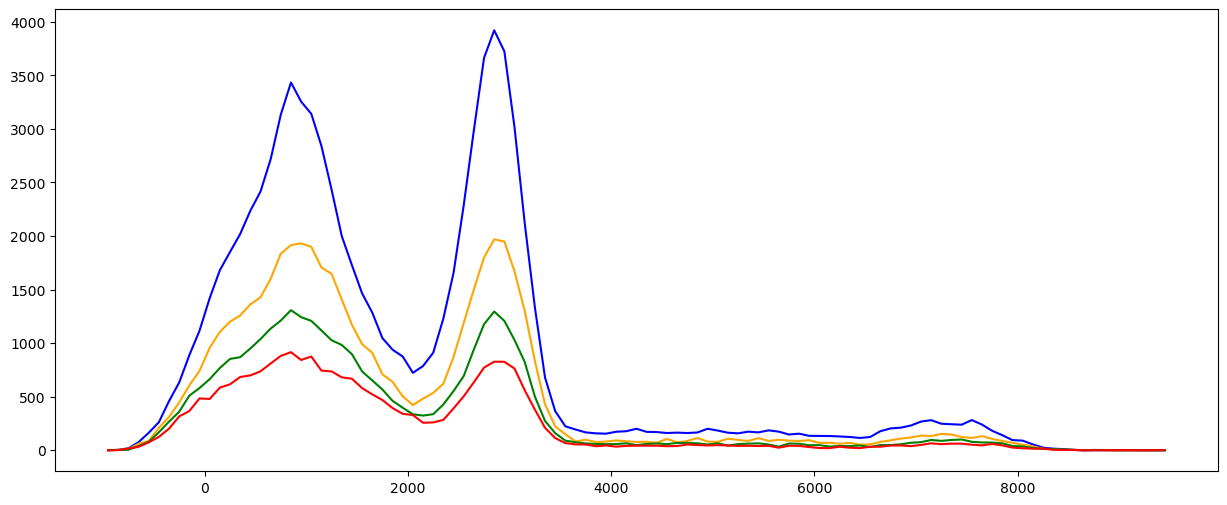

In [22]:
Na_B_1_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
fig, axes = plt.subplots(1, 1, figsize = (15, 6))
start_index_ar = 0
end_index_ar = 170 - 65
plt.plot(Na_B_1_ar['ADC'][start_index_ar:end_index_ar], Na_B_1_ar['Counts'][start_index_ar:end_index_ar], label = '1 cm', color = 'blue')
plt.plot(Na_B_2_ar['ADC'][start_index_ar:end_index_ar], Na_B_2_ar['Counts'][start_index_ar:end_index_ar], label = '2 cm', color = 'orange')
plt.plot(Na_B_3_ar['ADC'][start_index_ar:end_index_ar], Na_B_3_ar['Counts'][start_index_ar:end_index_ar], label = '3 cm', color = 'green')
plt.plot(Na_B_4_ar['ADC'][start_index_ar:end_index_ar], Na_B_4_ar['Counts'][start_index_ar:end_index_ar], label = '4 cm', color = 'red')

In [23]:
# 1cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_ar['ADC'][start_index_ar : end_index_ar], Na_B_1_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_1_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s1 = vals[2]
sig1 = vals[1]
err_s1 = errs[2]
err_sig1 = errs[1]

# 2cm
start_index_ar = 95 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_ar['ADC'][start_index_ar : end_index_ar], Na_B_2_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_2_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 3000, b = 0, c = 0)

s2 = vals[2]
sig2 = vals[1]
err_s2 = errs[2]
err_sig2 = errs[1]
# 3cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_ar['ADC'][start_index_ar : end_index_ar], Na_B_3_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_3_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s3 = vals[2]
sig3 = vals[1]
err_s3 = errs[2]
err_sig3 = errs[1]

# 4cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_ar['ADC'][start_index_ar : end_index_ar], Na_B_4_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_4_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s4 = vals[2]
sig4 = vals[1]
err_s4 = errs[2]
err_sig4 = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 46.66 (χ²/ndof = 2.6)      │              Nfcn = 328              │
│ EDM = 6.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 2.8493e3  │ 0.0023e3  │            │            │         │         │       │
│ 1 │ sigma │   259.2   │    2.3    │            │            │         │         │       │
│ 2 │ S     │  3.636e3  │  0.033e3  │            │            │         │         │       │
│ 3 │ a     │  3.23e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -1.66   │   0.08    │            │            │         │         │       │
│ 5 │ c     │ 0.223e-3  │ 0.013e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          5.21            -1             6            89        -0.051    7.21704e-6 │
│ sigma │            -1           5.5           -22            62        -0.063   11.87129e-6 │
│     S │             6           -22      1.07e+03         0.6e3        -0.467   80.87177e-6 │
│     a │            89            62         0.6e3      1.47e+04        -9.891 1.55588254e-3 │
│     b │        -0.051        -0.063        -0.467        -9.891       0.00688   -1.10320e-6 │
│     c │    7.21704e-6   11.87129e-6   80.87177e-6 1.55588254e-3   -1.10320e-6      1.79e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 56.38 (χ²/ndof = 3.3)      │              Nfcn = 384              │
│ EDM = 2.39e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 2.8718e3  │ 0.0035e3  │            │            │         │         │       │
│ 1 │ sigma │   267.3   │    3.5    │            │            │         │         │       │
│ 2 │ S     │  1.848e3  │  0.023e3  │            │            │         │         │       │
│ 3 │ a     │  1.86e3   │  0.10e3   │            │            │         │         │       │
│ 4 │ b     │   -0.94   │   0.06    │            │            │         │         │       │
│ 5 │ c     │ 0.123e-3  │ 0.010e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         12.3           -4            5          142       -0.077  10.43405e-6 │
│ sigma │           -4         12.2          -19           26       -0.047  10.00770e-6 │
│     S │            5          -19          536        0.3e3       -0.242  43.29407e-6 │
│     a │          142           26        0.3e3     9.85e+03       -6.282 953.80764e-6 │
│     b │       -0.077       -0.047       -0.242       -6.282      0.00417   -648.98e-9 │
│     c │  10.43405e-6  10.00770e-6  43.29407e-6 953.80764e-6   -648.98e-9     1.03e-10 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.91 (χ²/ndof = 1.3)      │              Nfcn = 352              │
│ EDM = 0.000103 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.878e3  │  0.004e3  │            │            │         │         │       │
│ 1 │ sigma │    256    │     4     │            │            │         │         │       │
│ 2 │ S     │  1.144e3  │  0.019e3  │            │            │         │         │       │
│ 3 │ a     │  1.30e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.63   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   79e-6   │   8e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         17.7           -4            5           98      -0.0565   7.88710e-6 │
│ sigma │           -4         18.4          -23           68      -0.0684  12.66392e-6 │
│     S │            5          -23          360        0.2e3      -0.1658  28.86067e-6 │
│     a │           98           68        0.2e3     5.52e+03      -3.6539 567.60544e-6 │
│     b │      -0.0565      -0.0684      -0.1658      -3.6539       0.0025   -395.92e-9 │
│     c │   7.88710e-6  12.66392e-6  28.86067e-6 567.60544e-6   -395.92e-9     6.35e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.62 (χ²/ndof = 1.3)      │              Nfcn = 385              │
│ EDM = 1.63e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.896e3  │  0.005e3  │            │            │         │         │       │
│ 1 │ sigma │    256    │     5     │            │            │         │         │       │
│ 2 │ S     │    756    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.18e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.58   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   74e-6   │   7e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         28.7           -6            4          117      -0.0671   9.39525e-6 │
│ sigma │           -6         28.9          -19           85      -0.0823  15.04886e-6 │
│     S │            4          -19          246       0.17e3      -0.1431  24.99547e-6 │
│     a │          117           85       0.17e3     4.59e+03      -3.0316 470.51528e-6 │
│     b │      -0.0671      -0.0823      -0.1431      -3.0316      0.00207   -326.89e-9 │
│     c │   9.39525e-6  15.04886e-6  24.99547e-6 470.51528e-6   -326.89e-9     5.23e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

## Confronto

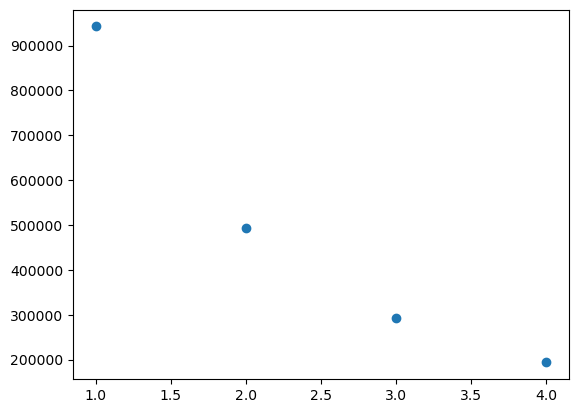

In [24]:
plt.plot (np.linspace(1, 4, 4), (abs(s1*sig1), abs(s2*sig2), abs(s3*sig3), abs(s4*sig4)), 'o')

In [25]:
pars, vals, errs, *others = LS_fit(np.linspace(1, 4, 4), (abs(s1*sig1), abs(s2*sig2), abs(s3*sig3), abs(s4*sig4)),
                                   (prop_err_mol(s1, sig1, err_s1, err_sig1),
                                    prop_err_mol(s2, sig2, err_s2, err_sig2),
                                    prop_err_mol(s3, sig3, err_s3, err_sig3),
                                    prop_err_mol(s4, sig4, err_s4, err_sig4)),
                                    ang_sol_exp, a = 10000, b = 0, c = 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1979 (χ²/ndof = 0.2)     │              Nfcn = 566              │
│ EDM = 3.12e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   8.2e6   │   2.3e6   │            │            │         │         │       │
│ 1 │ b    │   1.87    │   0.35    │            │            │         │         │       │
│ 2 │ c    │   0.05    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────┐
│   │             a             b             c │
├───┼───────────────────────────────────────────┤
│ a │      5.47e+12   816.75127e3 107.3009068e3 │
│ b │   816.75127e3         0.123        0.0159 │
│ c │ 107.3009068e3        0.0159       0.00215 │
└───┴───────────────────────────────────────────┘